In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings("ignore")

## 데이터 확인
- datetime - hourly date + timestamp  
- season
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
---
- **count - number of total rentals**

In [70]:
data = pd.read_csv('./data/train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


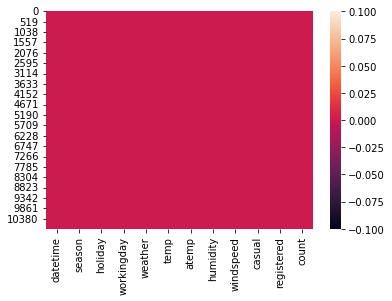

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [71]:
sns.heatmap(data.isnull())
plt.show()
data.info()

## 컬럼 살펴보기
### 1. Count(Target)

In [72]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<AxesSubplot:>

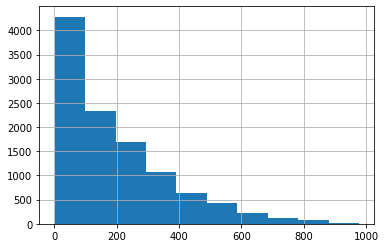

In [73]:
data['count'].hist()

<AxesSubplot:>

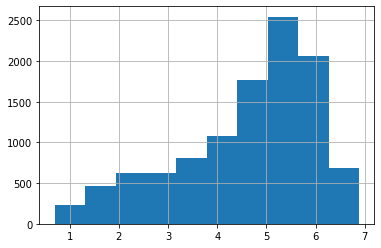

In [74]:
np.log1p(data['count']).hist()

In [75]:
data['count'] = np.log1p(data['count'])

In [82]:
data.iloc[0]['datetime']

'2011-01-01 00:00:00'

### 2. Datetime

In [7]:
data.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [8]:
data.datetime = data.datetime.apply(pd.to_datetime)

In [9]:
data.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [10]:
data['year'] = data.datetime.apply(lambda x : str(x.year))
data['month'] = data.datetime.apply(lambda x : str(x.month))
data['time'] = data.datetime.apply(lambda x: str(x.hour))
data['weekday'] = data.datetime.apply(lambda x: str(x.weekday()))

In [11]:
del data['datetime']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  float64
 11  year        10886 non-null  object 
 12  month       10886 non-null  object 
 13  time        10886 non-null  object 
 14  weekday     10886 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 1.2+ MB


### 3. holiday

In [12]:
data.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [13]:
data.holiday = data.holiday.apply(lambda x: str(x))

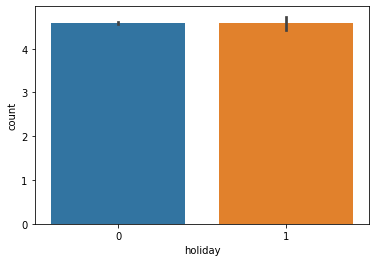

In [14]:
sns.barplot(x='holiday', y='count', data=data)
plt.show()

### 3. WorkingDay

In [15]:
data.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [16]:
data.workingday = data.workingday.apply(lambda x: str(x))

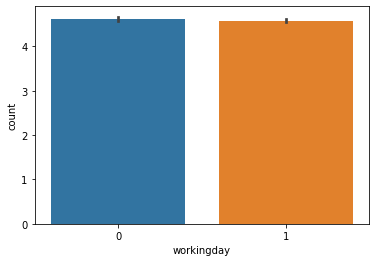

In [17]:
sns.barplot(x='workingday', y='count', data=data)
plt.show()

### 4. Weather

In [18]:
data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [19]:
data.weather = data.weather.apply(lambda x: str(x))

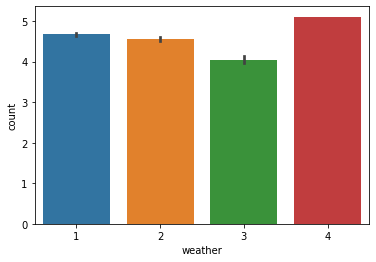

In [20]:
sns.barplot(x='weather', y='count', data=data)
plt.show()

### 5. temp

In [21]:
data.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

<AxesSubplot:>

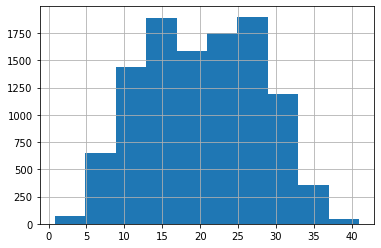

In [22]:
data.temp.hist()

### 6. atemp

In [23]:
data.atemp.value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

<AxesSubplot:>

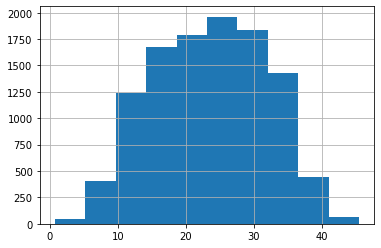

In [24]:
data.atemp.hist()

### 7. humidity

In [25]:
data.humidity.value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

<AxesSubplot:>

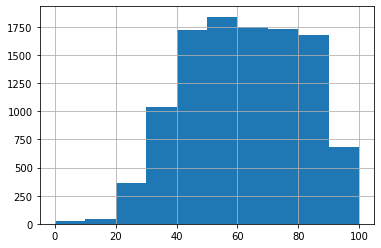

In [26]:
data.humidity.hist()

### 8. WindSpeed

In [27]:
data.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<AxesSubplot:>

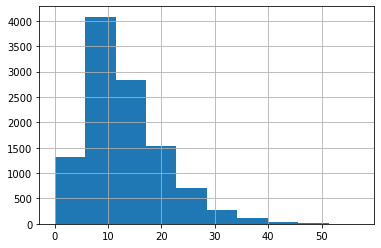

In [28]:
data.windspeed.hist()

### 9. Season

In [29]:
data.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [30]:
data.season = data.season.apply(lambda x: str(x))

## Heatmap

In [31]:
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,22,2


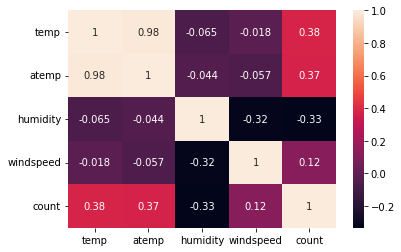

In [32]:
corr = data[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
# 모델링에 활용할 수 없는 컬럼 삭제
del data['casual'], data['registered']

In [34]:
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,time,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,2.833213,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,3.713572,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,3.496508,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2.639057,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0.693147,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,5.820083,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,5.488938,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,5.129899,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,4.867534,2012,12,22,2


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  object 
 2   workingday  10886 non-null  object 
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  float64
 9   year        10886 non-null  object 
 10  month       10886 non-null  object 
 11  time        10886 non-null  object 
 12  weekday     10886 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [36]:
data.describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,4.591364
std,7.79159,8.474601,19.245033,8.164537,1.419454
min,0.82000,0.760000,0.000000,0.000000,0.693147
25%,13.94000,16.665000,47.000000,7.001500,3.761200
50%,20.50000,24.240000,62.000000,12.998000,4.983607
75%,26.24000,31.060000,77.000000,16.997900,5.652489
max,41.00000,45.455000,100.000000,56.996900,6.885510


## 모델링(Rough)

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [38]:
data = pd.get_dummies(data)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  float64
 5   season_1      10886 non-null  uint8  
 6   season_2      10886 non-null  uint8  
 7   season_3      10886 non-null  uint8  
 8   season_4      10886 non-null  uint8  
 9   holiday_0     10886 non-null  uint8  
 10  holiday_1     10886 non-null  uint8  
 11  workingday_0  10886 non-null  uint8  
 12  workingday_1  10886 non-null  uint8  
 13  weather_1     10886 non-null  uint8  
 14  weather_2     10886 non-null  uint8  
 15  weather_3     10886 non-null  uint8  
 16  weather_4     10886 non-null  uint8  
 17  year_2011     10886 non-null  uint8  
 18  year_2012     10886 non-nu

In [40]:
Y = data['count']
del data['count']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=1993)
model = XGBRegressor(eval_metric='rmsle')

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
pred = model.predict(X_test)

In [44]:
rmsle(np.expm1(y_test), np.expm1(pred))

0.31315484924406395

## Norm

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [46]:
num_columns = ['temp', 'atemp', 'humidity', 'windspeed']

In [47]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       10886 non-null  float64
 1   atemp      10886 non-null  float64
 2   humidity   10886 non-null  int64  
 3   windspeed  10886 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 340.3 KB


In [48]:
ct = ColumnTransformer(
    transformers = [
        ("minmax", MinMaxScaler(), num_columns)
    ]
)

In [49]:
data[num_columns] = ct.fit_transform(data)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=1993)
model = XGBRegressor(eval_metric='rmsle')
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [51]:
pred

array([5.7840505, 4.3361807, 4.93928  , ..., 4.7634454, 5.068788 ,
       5.6387815], dtype=float32)

In [52]:
rmsle(np.expm1(y_test), np.expm1(pred))

0.3131772228984069

## Simple Submit

In [53]:
def data_preprocessing(input_data):
    input_data.datetime = input_data.datetime.apply(pd.to_datetime)
    input_data['year'] = input_data.datetime.apply(lambda x : str(x.year))
    input_data['month'] = input_data.datetime.apply(lambda x : str(x.month))
    input_data['time'] = input_data.datetime.apply(lambda x: str(x.hour))
    input_data['weekday'] = input_data.datetime.apply(lambda x: str(x.weekday()))
    
    del input_data['datetime']
    
    input_data.holiday = input_data.holiday.apply(lambda x: str(x))
    input_data.workingday = input_data.workingday.apply(lambda x: str(x))
    input_data.weather = input_data.weather.apply(lambda x: str(x))
    input_data.season = input_data.season.apply(lambda x: str(x))
    input_data[num_columns] = ct.transform(input_data)
    return pd.get_dummies(input_data,)

In [54]:
submission = pd.read_csv('./data/sampleSubmission.csv')
test = pd.read_csv('./data/test.csv')

In [55]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [56]:
test = data_preprocessing(test)
xgb = XGBRegressor(eval_metric='rmsle')
xgb.fit(data, Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
columns = data.columns

In [58]:
dummy = pd.DataFrame(columns=columns)
test = pd.concat([dummy, test])

In [59]:
for col in test.columns:
    if test[col].dtype == 'O':
        test[col] = test[col].apply(lambda x: np.uint8(x))

In [60]:
predict = np.expm1(xgb.predict(test))

In [61]:
submission['count'] = predict

In [62]:
submission.to_csv('./submit/20220804_first_submit.csv', encoding='utf-8', index=False)